In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import cv2
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.optimizers import SGD, Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.utils import to_categorical
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from sklearn.utils import shuffle
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.models import load_model
from emnist import extract_training_samples
from emnist import extract_test_samples
import tensorflow as tf

from keras.models import load_model
from keras.models import model_from_json
from keras.utils import img_to_array
%matplotlib inline
#physical_devices = tf.config.experimental.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(physical_devices[0], True)

model = load_model("HCRmodel.h5")

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay


Read the data

In [2]:
#x_train, y_train = extract_training_samples('byclass')
#x_test, y_test = extract_test_samples('byclass')
def FindLargestContour(ctrs):
    max = 0.0
    for ctr in ctrs:
        area = cv2.contourArea(ctr)
        if max < area:
            max = area
    return float(max)

def RemoveSmallContours(ctrs, image):
    mask = np.zeros(image.shape[:2], dtype=image.dtype)
    maxArea = FindLargestContour(ctrs)
    print('Max = ' + str(maxArea))
    for ctr in ctrs:
        if cv2.contourArea(ctr) > 0.3 * maxArea:
            x, y, w, h = cv2.boundingRect(ctr)
            cv2.drawContours(mask, [ctr], 0, (255), -1)
    result = cv2.bitwise_and(image, image, mask= mask)
    ctrs, _ = cv2.findContours(result, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    return ctrs

In [2]:
data = pd.read_csv(r"G:\SS\Handwritten-Text-Recognition-using-Machine-Learning\Handwritten Text Recognition\Handwritten Character Recognition\A_Z Handwritten Data.csv").astype('float32')

Split data into images and their labels

In [3]:
X = data.drop('0',axis = 1)
y = data['0']

Reshaping the data in the csv file so that it can be displayed as an image

In [4]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.2)
train_x = np.reshape(train_x.values, (train_x.shape[0], 28,28))
test_x = np.reshape(test_x.values, (test_x.shape[0], 28,28))

In [5]:
print("Train data shape: ", train_x.shape)
print("Test data shape: ", test_x.shape)

Train data shape:  (297960, 28, 28)
Test data shape:  (74490, 28, 28)


Dictionary for getting characters from index values

In [6]:
word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

Plotting the number of alphabets in the dataset

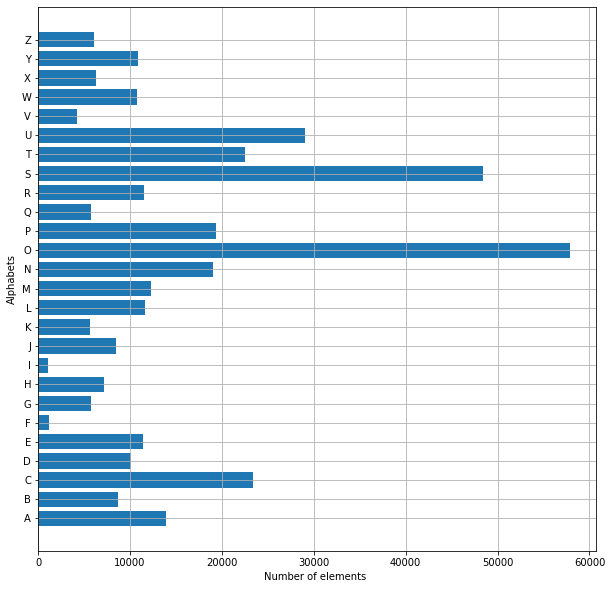

In [7]:
train_yint = np.int0(y)
count = np.zeros(26, dtype='int')
for i in train_yint:
    count[i] +=1

alphabets = []
for i in word_dict.values():
    alphabets.append(i)

fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.barh(alphabets, count)

plt.xlabel("Number of elements ")
plt.ylabel("Alphabets")
plt.grid()
plt.show()

Shuffling the data

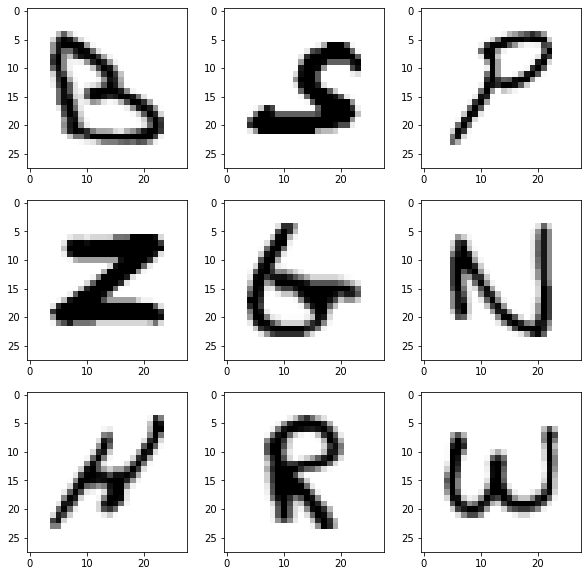

In [8]:
shuff = shuffle(train_x[:100])

fig, ax = plt.subplots(3,3, figsize = (10,10))
axes = ax.flatten()

for i in range(9):
    axes[i].imshow(np.reshape(shuff[i], (28,28)), cmap="Greys")
plt.show()

Reshaping the training & test dataset so that it can be put in the model

In [9]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
kf

KFold(n_splits=5, random_state=None, shuffle=False)

In [10]:
for train, test in kf.split(data):
  print('train: %s, test: %s' % (train, test))

train: [ 74490  74491  74492 ... 372447 372448 372449], test: [    0     1     2 ... 74487 74488 74489]
train: [     0      1      2 ... 372447 372448 372449], test: [ 74490  74491  74492 ... 148977 148978 148979]
train: [     0      1      2 ... 372447 372448 372449], test: [148980 148981 148982 ... 223467 223468 223469]
train: [     0      1      2 ... 372447 372448 372449], test: [223470 223471 223472 ... 297957 297958 297959]
train: [     0      1      2 ... 297957 297958 297959], test: [297960 297961 297962 ... 372447 372448 372449]


In [11]:
def get_score(model, train_x, test_x, train_y, test_y):
    model.fit(train_x, train_y)
    return model.score(test_x, test_y)

In [12]:
from sklearn.model_selection import cross_val_score


In [13]:
train_X = train_x.reshape(train_x.shape[0],train_x.shape[1],train_x.shape[2],1)
print("New shape of train data: ", train_X.shape)

test_X = test_x.reshape(test_x.shape[0], test_x.shape[1], test_x.shape[2],1)
print("New shape of test data: ", test_X.shape)

New shape of train data:  (297960, 28, 28, 1)
New shape of test data:  (74490, 28, 28, 1)


Converting the labels to categorical values

In [14]:
train_yOHE = to_categorical(train_y, num_classes = 26, dtype='int')
print("New shape of train labels: ", train_yOHE.shape)

test_yOHE = to_categorical(test_y, num_classes = 26, dtype='int')
print("New shape of test labels: ", test_yOHE.shape)

New shape of train labels:  (297960, 26)
New shape of test labels:  (74490, 26)


CNN model

In [15]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
#model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

#model.add(Conv2D(filters=48, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

#model.add(Conv2D(filters=96, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Flatten())

model.add(Dense(64,activation ="relu"))
model.add(Dense(128,activation ="relu"))

model.add(Dense(26,activation ="softmax"))



model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, min_lr=0.00001)
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')


history = model.fit(train_X, train_yOHE, epochs=1, callbacks=[reduce_lr, early_stop],  validation_data = (test_X,test_yOHE))


model.summary()
model.save(r'model_hand.h5')

9312/9312 [==============================] - 142s 15ms/step - loss: 0.1632 - accuracy: 0.9548 - val_loss: 0.0816 - val_accuracy: 0.9769 - lr: 0.0010
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 

Displaying the accuracies & losses for train & validation set

In [16]:
print("The validation accuracy is :", history.history['val_accuracy'])
print("The training accuracy is :", history.history['accuracy'])
print("The validation loss is :", history.history['val_loss'])
print("The training loss is :", history.history['loss'])

The validation accuracy is : [0.9769365191459656]
The training accuracy is : [0.9548328518867493]
The validation loss is : [0.08157622069120407]
The training loss is : [0.16322343051433563]


Making model predictions

In [17]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.2)
train_x = np.reshape(train_x.values, (train_x.shape[0], 28,28))
test_x = np.reshape(test_x.values, (test_x.shape[0], 28,28))

In [26]:
model.fit(train_y)

ValueError: in user code:

    File "c:\Users\S Sahoo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\S Sahoo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\S Sahoo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\S Sahoo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 889, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\S Sahoo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\S Sahoo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\input_spec.py", line 228, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" '

    ValueError: Exception encountered when calling layer "sequential" (type Sequential).
    
    Input 0 of layer "conv2d" is incompatible with the layer: expected min_ndim=4, found ndim=2. Full shape received: (None, 1)
    
    Call arguments received by layer "sequential" (type Sequential):
      • inputs=tf.Tensor(shape=(None, 1), dtype=float32)
      • training=True
      • mask=None


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
lr = LogisticRegression()
y_pred = lr.predict(train_y)


NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [25]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(test_y,y_pred)

NameError: name 'y_pred' is not defined

In [40]:
from sklearn.metrics import f1_score

In [43]:
from sklearn import metrics




In [44]:
sklearn.metrics.f1_score(y_true=test_x ,y_pred=test_y,labels=None,pos_label=1,)

NameError: name 'sklearn' is not defined

In [33]:
preds = p.predict(test_x)
preds[:15]

NameError: name 'p' is not defined

In [37]:
confusion_matrix(y_true=test_y, y_pred=test_x)

ValueError: Classification metrics can't handle a mix of multiclass and unknown targets

In [38]:
from sklearn.metrics import f1_score




In [39]:
train_x,test_x,train_y,test_y = cross_validation.train_test_split(data, target, test_size=0.3, random_state=42)
clf = RFC()
clf = clf.fit(train_x,train_y)
y_predict = clf.predict(test_x)[:,1]
print f1_score(test_y,y_predict)

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(...)? (2343991285.py, line 5)

In [30]:
#kf = KFold(5, shuffle=True, random_state=42)
#oos_y = []
#oos_pred = []
#fold = 0
#for train, test in kf.split(train_x):
#    fold +-1
#    print(f"Fold #{fold}")
#    x_train = train_x[train]
#    y_train = price[train]
#    x_test = X_train[test]
#    y_test = price[test]
#
#    y_out = layers.Dense(len(np.unique(y_train)),activation='softmax')(x)
#    ## compile
#    model = models.Model([idx, masks], y_out)
#    for layer in model.layers[:3]:
#        layer.trainable = False
#    # I am using adam optimizer as then hyper-parameters typically require little to no tuning 
#    model.compile(loss='mean_squared_error',optimizer='adam', metrics=['MeanSquaredError'])
#
#    ## train and predict
#    training = model.fit(x=x_train, y=y_train, batch_size=64, validation_data=(x_test,y_test), epochs=1, shuffle=True, verbose=1)
#    pred = model.predict(x_test)
#    oos_y.append(y_test)
#    oos_pred.append(pred)
#
#    score = np.sqrt(metrics.mean_squared_error(pred,y_test))
#    print(f"Fold score (RMSE): {score}")
#oos_y = np.concatenate(oos_y)
#oos_pred = np.concatenate(oos_pred)
#score = np.sqrt(metrics.mean_squared_error(oos_pred,oos_y))
#print(f"Final, out of sample score (RMSE): {score}")

NameError: name 'X_train' is not defined

In [28]:
lr.fit(train_x[:10000], train_y[:10000])
predictions = lr.predict(train_x[1000:])

print(classification_report(train_y[10000:], predictions))
pd.DataFrame(confusion_matrix(train_y[10000:], predictions))

ValueError: Found array with dim 3. LogisticRegression expected <= 2.

In [24]:
iris = datasets.load_iris()
x = iris.data
y = iris.target
class_names = iris.target_names

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [29]:
classifier = svm.SVC(kernel="linear", C=0.02).fit(x_train, y_train)

num.set_printoptions(precision=2)

title_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in title_options:
    display = ConfusionMatrixDisplay.from_estimator(
        classifier,
        x_test,
        y_test,
        display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    display.ax_.set_title(title)

    print(title)
    print(display.confusion_matrix)

plt.show()

NameError: name 'num' is not defined

In [26]:
pred = model.predict(test_X[:9])
print(test_X.shape)

1/1 [==============================] - 0s 110ms/step
(74490, 28, 28, 1)


Displaying some of the test images & their predicted labels

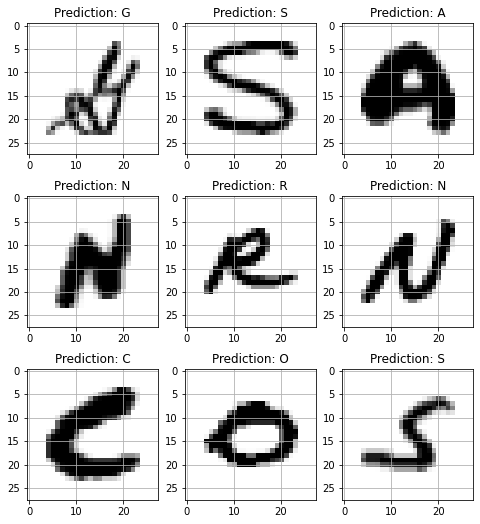

In [27]:
fig, axes = plt.subplots(3,3, figsize=(8,9))
axes = axes.flatten()

for i,ax in enumerate(axes):
    img = np.reshape(test_X[i], (28,28))
    ax.imshow(img, cmap="Greys")
    pred = word_dict[np.argmax(test_yOHE[i])]
    ax.set_title("Prediction: "+pred)
    ax.grid()

Prediction on external image

In [20]:
def PredictString(image): 
    classes = '0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz'
    image = cv2.imread(image)
    height, width, depth = image.shape

    image = cv2.resize(image, dsize=(width*5,height*4), interpolation=cv2.INTER_CUBIC)
    #grayscale
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    #binary
    ret,thresh = cv2.threshold(gray,127,255,cv2.THRESH_BINARY_INV)
    #dilation
    kernel = np.ones((5,5), np.uint8)
    img_dilation = cv2.dilate(thresh, kernel, iterations=1)
    #adding GaussianBlur
    gsblur=cv2.GaussianBlur(img_dilation,(5,5),0)
    #find contours
    ctrs, _ = cv2.findContours(gsblur.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    m = list()
    print(type(ctrs))
    #sort contours
    ctrs = RemoveSmallContours(ctrs, gsblur.copy())
    sorted_ctrs = sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])

    pchl = list()
    dp = image.copy()
    for i, ctr in enumerate(sorted_ctrs):
        # Get bounding box
        x, y, w, h = cv2.boundingRect(ctr)
        cv2.rectangle(dp,(x-15,y-15),( x + w + 15, y + h + 15 ),(90,0,255),9)    
    plt.imshow(dp)
    for i, ctr in enumerate(sorted_ctrs):
        # Get bounding box
        x, y, w, h = cv2.boundingRect(ctr)
        # Getting ROI
        roi = image[y-15:y+h+15, x-15:x+w+15]
        roi = cv2.resize(roi, dsize=(28,28), interpolation=cv2.INTER_CUBIC)
        roi = cv2.cvtColor(roi,cv2.COLOR_BGR2GRAY)

        roi = np.array(roi)
        t = np.copy(roi)
        t = t / 255.0
        t = 1-t
        t = t.reshape(28, 28, 1)
        t = np.expand_dims(t, axis=0)
        m.append(roi)
        #pred = model.predict_classes(t)
        predict_x=model.predict(t) 
        pred=np.argmax(predict_x,axis=1)
        pchl.append(pred)
        print('Prediction = ', classes[pchl[i][0]])

    pcw = list()
    interp = 'bilinear'
    fig, axs = plt.subplots(nrows=len(sorted_ctrs), sharex=True, figsize=(1,len(sorted_ctrs)))
    for i in range(len(pchl)):
        #print (pchl[i][0])
        pcw.append(classes[pchl[i][0]])
        axs[i].set_title('-------> predicted letter: '+classes[pchl[i][0]], x=2.5,y=0.24)
        axs[i].imshow(m[i], interpolation=interp)

    plt.show()


    predstring = ''.join(pcw)
    print('Predicted String: '+predstring)
    return predstring

<class 'tuple'>
Max = 76692.5
1/1 [==============================] - 0s 16ms/step
Prediction =  O
1/1 [==============================] - 0s 15ms/step
Prediction =  O
1/1 [==============================] - 0s 17ms/step
Prediction =  O
1/1 [==============================] - 0s 16ms/step
Prediction =  O
1/1 [==============================] - 0s 15ms/step
Prediction =  O


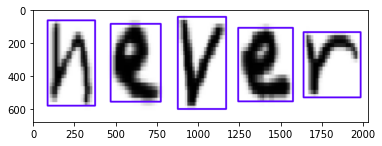

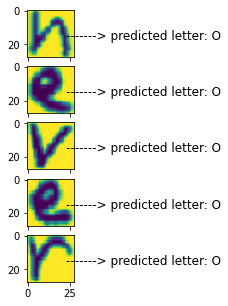

Predicted String: OOOOO


'OOOOO'

In [21]:
PredictString('sample1.png')

In [20]:
img = cv2.imread(r'G:\SS\Handwritten-Text-Recognition-using-Machine-Learning\3.png')
img_copy = img.copy()

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (400,440))

img_copy = cv2.GaussianBlur(img_copy, (7,7), 0)
img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
_, img_thresh = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY_INV)

img_final = cv2.resize(img_thresh, (28,28))
img_final =np.reshape(img_final, (1,28,28,1))


img_pred = word_dict[np.argmax(model.predict(img_final))]

cv2.putText(img, "", (20,25), cv2.FONT_HERSHEY_TRIPLEX, 0.7, color = (0,0,230))
cv2.putText(img, "Prediction: " + img_pred, (20,410), cv2.FONT_HERSHEY_DUPLEX, 1.3, color = (255,0,30))
cv2.imshow('Handwritten Character Recognition', img)

1/1 [==============================] - 0s 74ms/step


In [23]:
while (1):
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
cv2.destroyAllWindows()

: 

: 

<class 'tuple'>
Max = 1294632.5
1/1 [==============================] - 0s 17ms/step
Prediction =  R
1/1 [==============================] - 0s 16ms/step
Prediction =  I
1/1 [==============================] - 0s 16ms/step
Prediction =  d
1/1 [==============================] - 0s 15ms/step
Prediction =  h
1/1 [==============================] - 0s 14ms/step
Prediction =  a


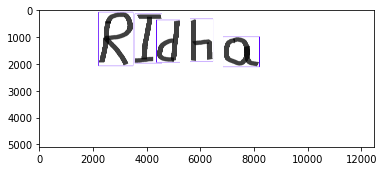

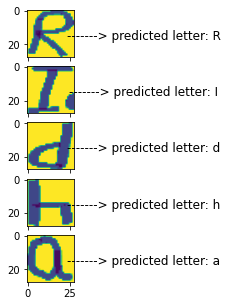

Predicted String: RIdha


'RIdha'

In [ ]:
PredictString(r'G:\SS\Handwritten-Text-Recognition-using-Machine-Learning\sample10.png')
